# Recap from lab session

## Question 1
### Given two words, determine if they are synonyms using WordNet.

- In `WordNet`, a synset is in fact a set of _lemmas_, which can be accessed via the `synset.lemmas()` method. A WordNet's lemma is the equivalent to a dictionary entry, and a `lemma` object has other useful methods and attributes like hypernyms, antonyms, etc. (but not synonyms). A string representation of a synset's lemmas can be accessed via the `synset.lemma_names()` method.


- You should implement a function `are_synonyms(w1,w2)`, which takes as input two words (`w1` and `w2`) returns `True` if they are synonyms and `False` if they are not. 

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('genesis')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
for s in wn.synsets('home'):
  print(s,'->',s.lemma_names(),s.definition()) # s.definition() is a string with the definition of the synset and s.lemma_names() is a list of strings with the lemmas of the synset

Synset('home.n.01') -> ['home', 'place'] where you live at a particular time
Synset('dwelling.n.01') -> ['dwelling', 'home', 'domicile', 'abode', 'habitation', 'dwelling_house'] housing that someone is living in
Synset('home.n.03') -> ['home'] the country or state or city where you live
Synset('home_plate.n.01') -> ['home_plate', 'home_base', 'home', 'plate'] (baseball) base consisting of a rubber slab where the batter stands; it must be touched by a base runner in order to score
Synset('base.n.14') -> ['base', 'home'] the place where you are stationed and from which missions start and end
Synset('home.n.06') -> ['home'] place where something began and flourished
Synset('home.n.07') -> ['home'] an environment offering affection and security
Synset('family.n.01') -> ['family', 'household', 'house', 'home', 'menage'] a social unit living together
Synset('home.n.09') -> ['home', 'nursing_home', 'rest_home'] an institution where people are cared for
Synset('home.v.01') -> ['home'] provide 

In [3]:
from nltk.corpus import wordnet as wn

w1 = 'home'
w2 = 'house'

def are_synonyms(w1,w2):
    w1_syns = wn.synsets(w1)
    for s in w1_syns:
        lemmas = s.lemma_names()
        for l in lemmas:
            if l==w2:
                print(w1,' and ',w2,' are synonyms')
                return
    print(w1,' and ',w2,' are not synonyms')
    
are_synonyms(w1,w2)

home  and  house  are synonyms


## Question 2
### Given a word, two Part of Speech tags, and a corpus, determine with which PoS the word is more frequent in that corpus.

Your implementation should be:

- A function called `get_frequency(word,pos1,pos2,corpus)`, where:
    - `word` is a string.
    - `pos1` and `pos2` are PoS tags (to simplify, you can use the first character of a PoS to group all its variations into one: `v -> VBZ, VBN, etc.`).
    - `corpus` is an NLTK corpus object. 
    
    
- Note 1. Some of the corpora available from `nltk.corpus` come with a tagged version, e.g., the Brown corpus. Do **not** tag them if they are already tagged.:
```python
from nltk.corpus import brown
tagged_brown = brown.tagged_words()
print(tagged_brown[:10])
>>> [('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN')]
```

- Note 2. You can access the available methods and attributes of a Python object with `dir`:

```python
from nltk import corpus
available = dir(corpus)
print('brown' in available)
>>> True
brown = corpus.brown
genesis = corpus.genesis
print('tagged_words' in dir(brown),'tagged_words' in dir(genesis))
>>> True False
```

- Note 3. When tagging a corpus, it is better to do so by sentence, and not running the tagger on the whole corpus.

In [4]:
from nltk.corpus import brown

len(brown.sents()),len(brown.words()) # number of sentences and words in the Brown corpus

(57340, 1161192)

In [5]:
from nltk.tag import pos_tag

s = 'We are learning programming'

pos_tag(s.split())

[('We', 'PRP'), ('are', 'VBP'), ('learning', 'VBG'), ('programming', 'VBG')]

In [6]:
from nltk.corpus import genesis, brown, gutenberg

def get_frequency(input_word,pos1,pos2,corpus):
    
    # optional: define mapping dictionary for returning readable PoS
    posmap = {'n': 'noun', 'v':'verb', 'i':'preposition'} # et

    
    
    # determine if we need to tag the corpus
    if 'tagged_words' in dir(corpus):
        # if no, get the tagged words
        tagged_corpus = corpus.tagged_words()
    else:
        # if yes, get the (untagged) sentences and then tag them individually
        from nltk.tag import pos_tag
        tagged_corpus = []
        sents = corpus.sents()
        for s in sents:
            tagged_sent = pos_tag(s)
            for tagged_token in tagged_sent:
                tagged_corpus.append(tagged_token)
    # iterate over each word/tag pair in the tagged corpus
    freqs = {}
    for word,tag in tagged_corpus:
        word = word.lower()
        normtag = tag.lower()[0]
        if word == input_word:
          # convert e.g., NNP to n           
          # count each PoS tag and assign to dictionary
          if normtag == pos1 and not pos1 in freqs:
              freqs[pos1] = 1
          elif normtag == pos1 and pos1 in freqs:
              freqs[pos1] += 1
          elif normtag == pos2 and not pos2 in freqs:
              freqs[pos2] = 1
          elif normtag == pos2 and pos2 in freqs:
              freqs[pos2] += 1
            
    print(freqs)  
    # return resulting string
    out_str = 'Word "{}" is more frequent as a {} than as a {}'.format(input_word,posmap[pos1],posmap[pos2])    
    if freqs[pos1] > freqs[pos2]:
        return out_str.format(input_word,pos1,pos2)
    else:
        return out_str.format(input_word,pos2,pos1)

In [7]:
w = 'like'
pos1 = 'v'
pos2 = 'i'

corpus = brown
    
get_frequency(w,pos1,pos2,corpus)

{'v': 211, 'i': 33}


'Word "like" is more frequent as a verb than as a preposition'

## Bonus - Dealing with text data using pandas

In [8]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import nltk

In [9]:
import pandas as pd

df = pd.read_csv('reviews_test.csv', error_bad_lines=False)

C:\Users\C21099~1\AppData\Local\Temp/ipykernel_24604/789942884.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('reviews_test.csv', error_bad_lines=False)


In [10]:
df.head()

,Unnamed: 0,Id,Text
0,0,1,I have bought several of the Vitality canned d...
1,1,2,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,This is a confection that has been around a fe...
3,3,4,If you are looking for the secret ingredient i...
4,4,5,Great taffy at a great price. There was a wid...


In [11]:
df.Text.str.lower().str.findall('great (\w+)').explode().dropna()

4         taffy
4         price
6       flavors
27         deal
28         that
         ...   
9989       milk
9990    product
9990        for
9991    success
9999       with
Name: Text, Length: 2243, dtype: object

In [12]:
# pandas has a string method that enables basic (and not so basic) operations on strings
df.Text.str.lower().str.findall('great (\w+)').explode().dropna().value_counts()

product     166
for         165
and         114
price       104
flavor       71
           ... 
am            1
combos        1
like          1
sandwich      1
milk          1
Name: Text, Length: 470, dtype: int64

In [13]:
df.Text.apply(sent_tokenize)

0       [I have bought several of the Vitality canned ...
1       [Product arrived labeled as Jumbo Salted Peanu...
2       [This is a confection that has been around a f...
3       [If you are looking for the secret ingredient ...
4       [Great taffy at a great price., There was a wi...
                              ...                        
9995    [we switched from the advance similac to the o...
9996    [Like the bad reviews say, the organic formula...
9997    [I wanted to solely breastfeed but was unable ...
9998    [i love the fact that i can get this delieved ...
9999    [We have a 7 week old..., He had gas and const...
Name: Text, Length: 10000, dtype: object

In [15]:
list(df.Text)[:10]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

In [17]:
# Import tqdm for progress bar
from tqdm import tqdm




for i in tqdm(range(1000000)):
  pass

100%|██████████| 1000000/1000000 [00:00<00:00, 2169623.95it/s]


In [18]:
# showing how to get progress bars on jupyter notebook
from tqdm import tqdm
tqdm.pandas()

df.Text.progress_apply(sent_tokenize)

100%|██████████| 10000/10000 [00:02<00:00, 3639.24it/s]


0       [I have bought several of the Vitality canned ...
1       [Product arrived labeled as Jumbo Salted Peanu...
2       [This is a confection that has been around a f...
3       [If you are looking for the secret ingredient ...
4       [Great taffy at a great price., There was a wi...
                              ...                        
9995    [we switched from the advance similac to the o...
9996    [Like the bad reviews say, the organic formula...
9997    [I wanted to solely breastfeed but was unable ...
9998    [i love the fact that i can get this delieved ...
9999    [We have a 7 week old..., He had gas and const...
Name: Text, Length: 10000, dtype: object

# Today - More text and pandas

We look at different examples on how we can process text data using pandas and some basic python. There are 3 exercises, (1) find the most positive and most negative books; (2) plot an ecdf plot with seaborn to visualize the cumulative distribution of positive scores per sentence for the 2  most extreme (most positive and most negative books); and (3) visualize the median pos score in the ecdf plot.

# 0 - Data preparation (not an exercise)

## Imports and resources

In [19]:
import nltk
import pandas as pd
from nltk.corpus import gutenberg
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# vader is an algorithm that scores text as positive/neutral/negative based on a "sentiment dictionary"
nltk.download('vader_lexicon')
# we will use the books from project gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\c21099797\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [26]:
tqdm.pandas()
analyzer = SentimentIntensityAnalyzer()

## Read in book data, convert to dataframe with sentiment scores

In [27]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [28]:
rows = []
for bookid in gutenberg.fileids():

  print('Processing: ',bookid)
  for s in gutenberg.sents(bookid):
    sstr = ' '.join(s)
    scores = analyzer.polarity_scores(sstr)
    row = {
        'book':bookid,
        'sent':sstr,
        'pos':scores['pos'],
        'neg':scores['neg'],
        'neu':scores['neu'],
        'compound':scores['compound'],
    }
    rows.append(row)

df = pd.DataFrame(rows)

Processing:  austen-emma.txt
Processing:  austen-persuasion.txt
Processing:  austen-sense.txt
Processing:  bible-kjv.txt
Processing:  blake-poems.txt
Processing:  bryant-stories.txt
Processing:  burgess-busterbrown.txt
Processing:  carroll-alice.txt
Processing:  chesterton-ball.txt
Processing:  chesterton-brown.txt
Processing:  chesterton-thursday.txt
Processing:  edgeworth-parents.txt
Processing:  melville-moby_dick.txt
Processing:  milton-paradise.txt
Processing:  shakespeare-caesar.txt
Processing:  shakespeare-hamlet.txt
Processing:  shakespeare-macbeth.txt
Processing:  whitman-leaves.txt


In [29]:
df.head()

,book,sent,pos,neg,neu,compound
0,austen-emma.txt,[ Emma by Jane Austen 1816 ],0.000,0.000,1.000,0.0000
1,austen-emma.txt,VOLUME I,0.000,0.000,1.000,0.0000
2,austen-emma.txt,CHAPTER I,0.000,0.000,1.000,0.0000
3,austen-emma.txt,"Emma Woodhouse , handsome , clever , and rich ...",0.409,0.057,0.534,0.9687
4,austen-emma.txt,She was the youngest of the two daughters of a...,0.099,0.000,0.901,0.4927


## Make a summary df

With one book per row, and average pos, neg, neu and compound sentiment scores.


In [30]:
df.groupby('book').mean().sort_values(by='pos', ascending=False)

,pos,neg,neu,compound
book,,,,
blake-poems.txt,0.152283,0.118639,0.726776,0.085783
milton-paradise.txt,0.151702,0.116502,0.730169,0.143992
austen-emma.txt,0.134713,0.071546,0.789744,0.179784
austen-persuasion.txt,0.130066,0.068007,0.801930,0.177555
austen-sense.txt,0.128514,0.076197,0.795293,0.168369
whitman-leaves.txt,0.113428,0.062215,0.824121,0.148242
edgeworth-parents.txt,0.111168,0.067959,0.819307,0.110656
burgess-busterbrown.txt,0.094896,0.069843,0.832419,0.077658
chesterton-ball.txt,0.093255,0.081700,0.823791,0.026464


# 1 - Most extreme, in terms of positive sentences

We do this by looking at their average `pos` score (highest and lowest). Can you do it in a one-liner?

In [39]:
# Just show the books only with the highest positive sentiment
df.groupby('book').mean().sort_values(by='pos', ascending=False).head(15).index.tolist()

['blake-poems.txt',
 'milton-paradise.txt',
 'austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'whitman-leaves.txt',
 'edgeworth-parents.txt',
 'burgess-busterbrown.txt',
 'chesterton-ball.txt',
 'chesterton-thursday.txt',
 'bryant-stories.txt',
 'chesterton-brown.txt',
 'carroll-alice.txt',
 'melville-moby_dick.txt',
 'bible-kjv.txt']

In [44]:
# here we retrieve the most and least positive books from the column 'book' and print the column book in one line

print('Most positive books: ',df.groupby('book').mean().sort_values(by='pos', ascending=False).head(1).index.tolist(), 'Least positive books: ',df.groupby('book').mean().sort_values(by='pos', ascending=False).tail(1).index.tolist())

Most positive books:  ['blake-poems.txt'] Least positive books:  ['shakespeare-macbeth.txt']


# 2 - Plot an ECDF plot for the `pos` column


ECDF stands for _empirical cumulative distribution functions_, and it's a good way to visualize the distribution of a dataset as a whole. It's more difficult to find mean values, but easier to see full data ranges. __The more to the right the line is, the higher the values__.

 (we only look at the `pos` column)

 By looking at the data, what books / authors stand out?

In [45]:
sns.set(rc={'figure.figsize':(10,7)})

<AxesSubplot:xlabel='pos', ylabel='Proportion'>

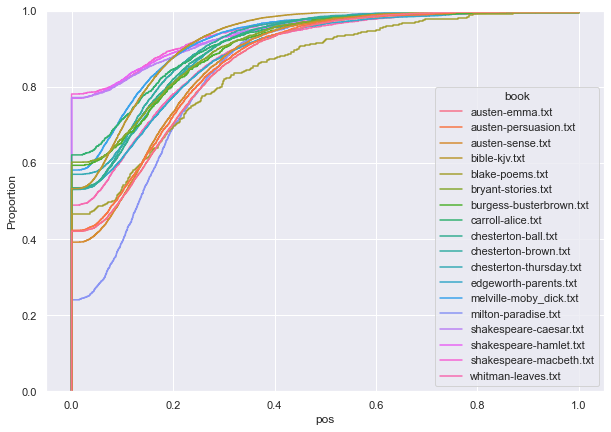

In [51]:
# your code here, it will probably start with sns.ecdfplot( - something here -)
# By only looking at the pos column what book stands out 

sns.ecdfplot(data=df, x='pos', hue='book')

# 3 - Plot an ECDF plot for the most and least positive books

Plot an `ecdf` for the most positive and least positive.

In [49]:
sns.set(rc={'figure.figsize':(10,7)})

<AxesSubplot:xlabel='pos', ylabel='Proportion'>

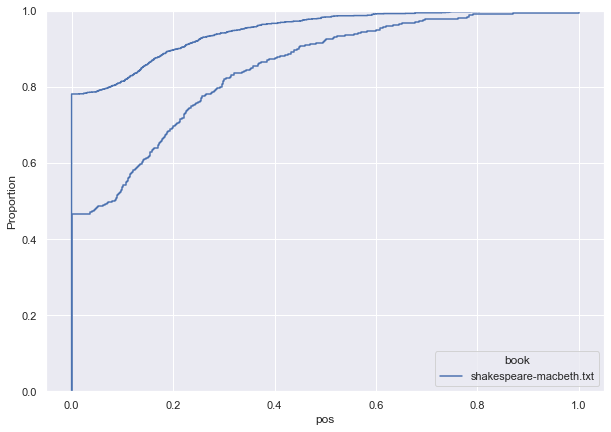

In [53]:
# your code here, it will probably start with sns.ecdfplot( - something here -)

# plot and ecdf for the most positive and least positive boook in one plot

sns.ecdfplot(data=df, x='pos', hue='book', hue_order=df.groupby('book').mean().sort_values(by='pos', ascending=False).head(1).index.tolist())

sns.ecdfplot(data=df, x='pos', hue='book', hue_order=df.groupby('book').mean().sort_values(by='pos', ascending=False).tail(1).index.tolist())


# 4 - Same data, median in flipped ecdf plot

If we flip the ecdf plot (proportion on the x axis, target variable on the y axis), we can easily plot the median and visualize what we have to the left and right of the 50th percentile, which cuts the data in half.

<AxesSubplot:xlabel='pos', ylabel='Proportion'>

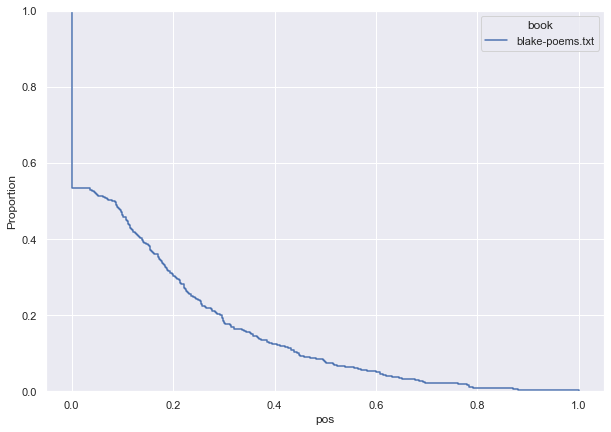

In [56]:
# your code here, it will probably start with sns.ecdfplot( - something here -)

#  flip the ecdf plot (proportion on the x axis, target variable on the y axis), we can easily plot the median and visualize what we have to the left and right of the 50th percentile, which cuts the data in half.

sns.ecdfplot(data=df, x='pos', hue='book', hue_order=df.groupby('book').mean().sort_values(by='pos', ascending=False).head(1).index.tolist(), stat='proportion', complementary=True)
